In [4]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [15]:
def extract_last_two_numbers(file_path):
    orig = []
    adv = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            if len(parts) >= 2:
                last_two = parts[-2:]  # Get the last two elements
                orig.append(float(last_two[0]))
                adv.append(float(last_two[1]))
    return orig, adv


In [16]:
with open("config.json", "r") as f:
    config = json.load(f)

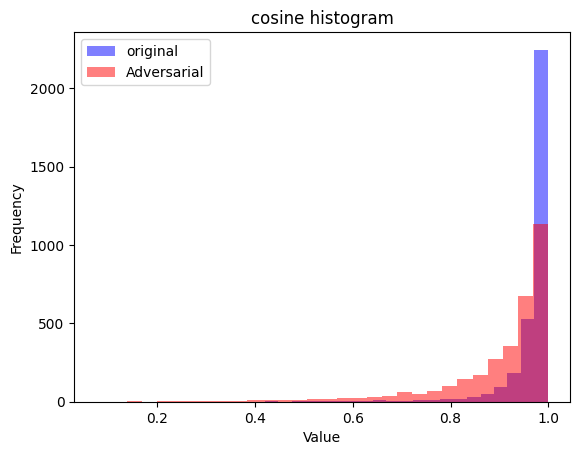

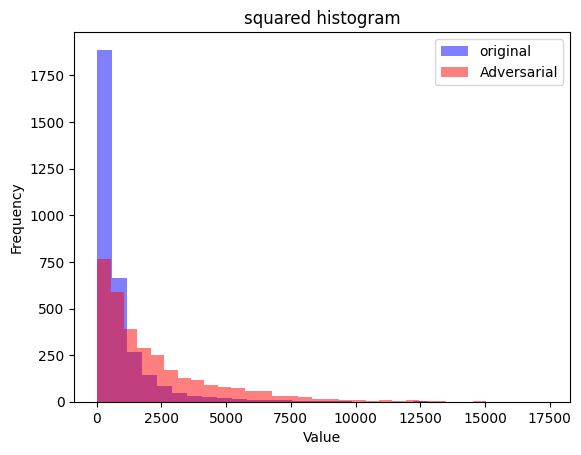

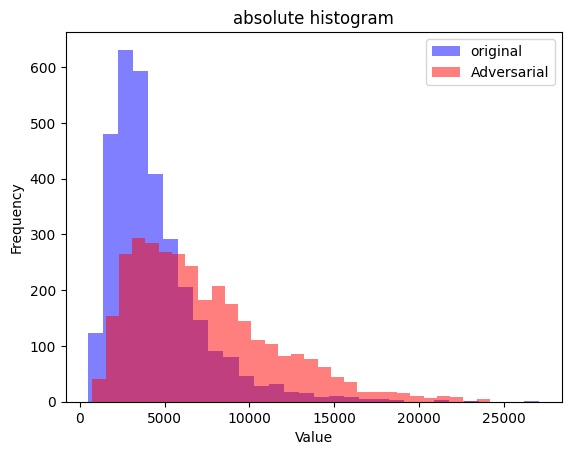

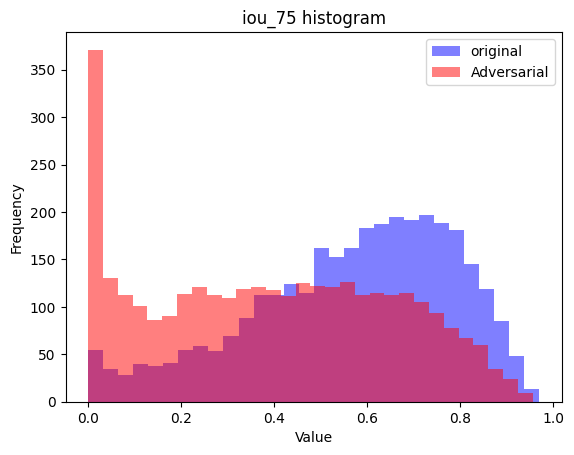

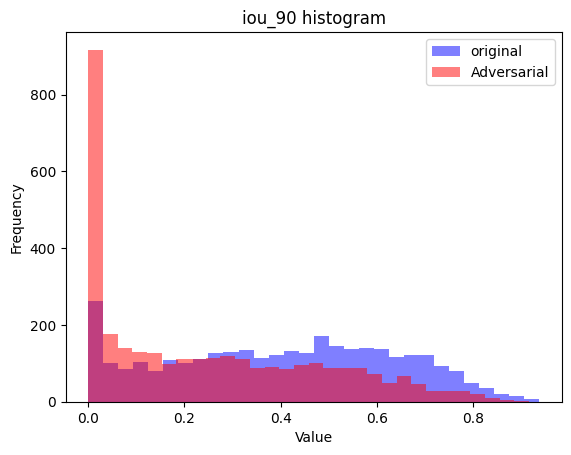

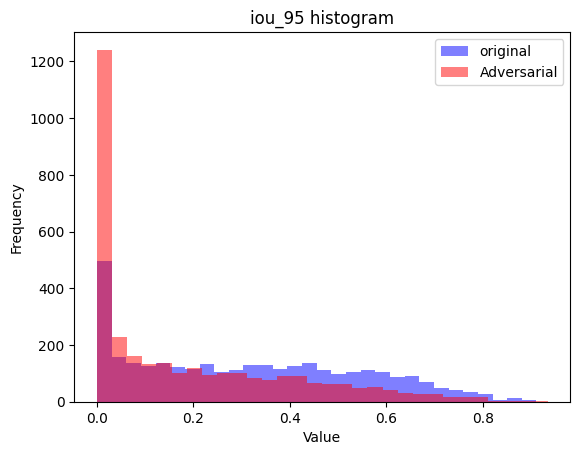

In [17]:
res_dir = "results"

results_dict = {metric: {"orig": [], "adv": []} for metric in config["distance_metrics"]}


for distance_metric in config["distance_metrics"]:
    orig, adv = extract_last_two_numbers(f"{res_dir}/{distance_metric}.txt")
    results_dict[distance_metric]["orig"] = orig
    results_dict[distance_metric]["adv"] = adv
    plt.figure()
    plt.hist(orig, bins=30, alpha=0.5, label="original", color="blue")
    plt.hist(adv, bins=30, alpha=0.5, label="Adversarial", color="red")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(f"{distance_metric} histogram")
    plt.legend()
    plt.show()

In [10]:
from sklearn.metrics import roc_curve, auc

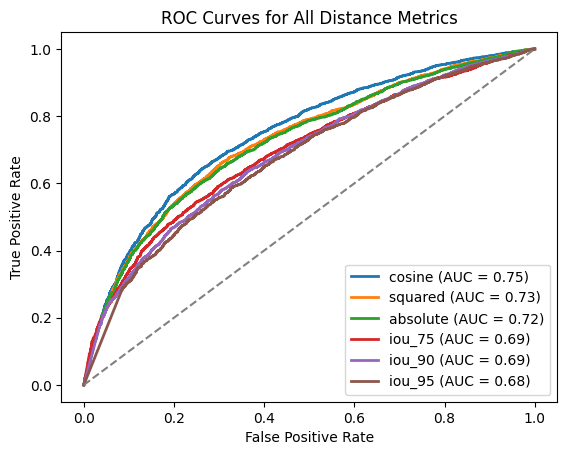

In [20]:
# Create a figure for all ROC curves
plt.figure()

# Iterate over each distance metric and calculate the ROC curve
for distance_metric in config["distance_metrics"]:
    orig = results_dict[distance_metric]["orig"]
    adv = results_dict[distance_metric]["adv"]

    # For some distance metrics, we need to invert the scores
    if distance_metric  not in ["squared", "absolute"]:
        orig = [-x for x in orig]
        adv = [-x for x in adv]

    y_true = np.array([0] * len(orig) + [1] * len(adv))
    
    # Concatenate the scores (distance values)
    y_scores = np.array(orig + adv)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each distance metric
    plt.plot(fpr, tpr, lw=2, label=f"{distance_metric} (AUC = {roc_auc:.2f})")

# Plot the diagonal line for reference (random classifier)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Customize the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Distance Metrics")
plt.legend(loc="lower right")

# Show the plot
plt.show()